# Employee Attrition Prediction Milestone3 - Group07 (Mayank & Vansh)



# SECTION 1 - DATA PREPROCESSING

## 1. Importing Libraries

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Reading the dataset

In [175]:
employeedata= pd.read_csv("Employee Dataset.csv")

## 3. Data frame operations

In [176]:
employeedata.shape

(902, 16)

In [177]:
employeedata.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay


### 3.1 Droping columns which is not needed

In [178]:
employeedata.drop(columns=['table id', 'phone number','name', 'Tenure Grp.'],inplace=True)

In [179]:
employeedata.head()

,Location,Emp. Group,Function,Gender,Tenure,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left
0,Pune,B2,Operation,Male,0.00,6.08,Single,27.12,Direct,Non Promoted,Yes,Left
1,Noida,B7,Support,Male,0.00,13.00,Marr.,38.08,Direct,Promoted,No,Stay
2,Bangalore,B3,Operation,Male,0.01,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay
3,Noida,B2,Operation,Male,0.01,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay
4,Lucknow,B2,Operation,Male,0.00,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay


In [180]:
employeedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902 entries, 0 to 901
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               902 non-null    object 
 1   Emp. Group             902 non-null    object 
 2   Function               902 non-null    object 
 3   Gender                 902 non-null    object 
 4   Tenure                 900 non-null    float64
 5   Experience (YY.MM)     897 non-null    float64
 6   Marital Status         902 non-null    object 
 7   Age in YY.             899 non-null    float64
 8   Hiring Source          902 non-null    object 
 9   Promoted/Non Promoted  902 non-null    object 
 10  Job Role Match         900 non-null    object 
 11  Stay/Left              902 non-null    object 
dtypes: float64(3), object(9)
memory usage: 84.7+ KB


## 3. Checking of missing values

In [181]:
employeedata.isnull().sum()

Location                 0
Emp. Group               0
Function                 0
Gender                   0
Tenure                   2
Experience (YY.MM)       5
Marital Status           0
Age in YY.               3
Hiring Source            0
Promoted/Non Promoted    0
Job Role Match           2
Stay/Left                0
dtype: int64

## 4. Handling the missing values

In [182]:
# Handling categorical missing values columns
mode1=employeedata['Job Role Match'].mode()
mode1

0    Yes
dtype: object

In [183]:
employeedata['Job Role Match'].replace(np.nan,'Yes', inplace=True)

In [184]:
#handling continous missing values columns
#fillna()
mean_age=employeedata["Age in YY."].mean()
employeedata["Age in YY."].fillna(mean_age,inplace=True)

mean_tenure=employeedata["Tenure"].mean()
employeedata["Tenure"].fillna(mean_tenure,inplace=True)

mean_exp=employeedata["Experience (YY.MM)"].mean()
employeedata["Experience (YY.MM)"].fillna(mean_tenure,inplace=True)

In [185]:
employeedata.isnull().sum()

Location                 0
Emp. Group               0
Function                 0
Gender                   0
Tenure                   0
Experience (YY.MM)       0
Marital Status           0
Age in YY.               0
Hiring Source            0
Promoted/Non Promoted    0
Job Role Match           0
Stay/Left                0
dtype: int64

## 5. Extraction of dependent and independent variables


In [186]:
x=employeedata.iloc[:,0:11]
y=employeedata.iloc[:,11:12]

In [187]:
x

,Location,Emp. Group,Function,Gender,Tenure,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match
0,Pune,B2,Operation,Male,0.00,6.08,Single,27.12,Direct,Non Promoted,Yes
1,Noida,B7,Support,Male,0.00,13.00,Marr.,38.08,Direct,Promoted,No
2,Bangalore,B3,Operation,Male,0.01,16.05,Marr.,36.04,Direct,Promoted,Yes
3,Noida,B2,Operation,Male,0.01,6.06,Marr.,32.07,Direct,Promoted,Yes
4,Lucknow,B2,Operation,Male,0.00,7.00,Marr.,32.05,Direct,Non Promoted,Yes
...,...,...,...,...,...,...,...,...,...,...,...
897,Vijayawada,B1,Operation,Female,0.03,0.03,Single,21.09,Direct,Non Promoted,Yes
898,Vijayawada,B1,Operation,Female,0.03,0.03,Single,22.02,Direct,Non Promoted,Yes
899,Vijayawada,B1,Operation,Female,0.03,0.03,Single,22.01,Direct,Non Promoted,Yes
900,Vijayawada,B1,Operation,Female,0.03,0.03,Single,22.02,Direct,Non Promoted,Yes


In [188]:
y

,Stay/Left
0,Left
1,Stay
2,Stay
3,Stay
4,Stay
...,...
897,Stay
898,Left
899,Left
900,Stay


## 7. Handling the categorical data

In [189]:
x=pd.get_dummies(x)
x.head()

,Tenure,Experience (YY.MM),Age in YY.,Location_Bangalore,Location_Chennai,Location_Gurgaon,Location_Hyderabad,Location_Kolkata,Location_Lucknow,Location_Madurai,...,Marital Status_NTBD,Marital Status_Sep.,Marital Status_Single,Hiring Source_Agency,Hiring Source_Direct,Hiring Source_Employee Referral,Promoted/Non Promoted_Non Promoted,Promoted/Non Promoted_Promoted,Job Role Match_No,Job Role Match_Yes
0,0.00,6.08,27.12,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
1,0.00,13.00,38.08,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
2,0.01,16.05,36.04,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
3,0.01,6.06,32.07,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,0.00,7.00,32.05,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,1


In [190]:
y.replace('Left', 1, inplace=True)
y.replace('Stay', 0, inplace=True)
y

,Stay/Left
0,1
1,0
2,0
3,0
4,0
...,...
897,0
898,1
899,1
900,0


## 8. Splitting the dataset into train (80%) and test (20%)

In [191]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test=train_test_split(x,y, test_size=0.2, random_state=0)

## 9. Feature scaling

In [193]:
# feature scalling ----Nomalization
from sklearn.preprocessing import MinMaxScaler
mmsc=MinMaxScaler()
X_train=mmsc.fit_transform(X_train)
X_test=mmsc.transform(X_test)

__-----------------------------------------------------------------------END OF SECTION 1-----------------------------------------------------------------------------__




#  SECTION 2 - DATA VISUALIZATION


In [194]:
employeedata.head()

,Location,Emp. Group,Function,Gender,Tenure,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left
0,Pune,B2,Operation,Male,0.00,6.08,Single,27.12,Direct,Non Promoted,Yes,Left
1,Noida,B7,Support,Male,0.00,13.00,Marr.,38.08,Direct,Promoted,No,Stay
2,Bangalore,B3,Operation,Male,0.01,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay
3,Noida,B2,Operation,Male,0.01,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay
4,Lucknow,B2,Operation,Male,0.00,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay


## 1. Individual column charts

### 1.1 Employee's Age

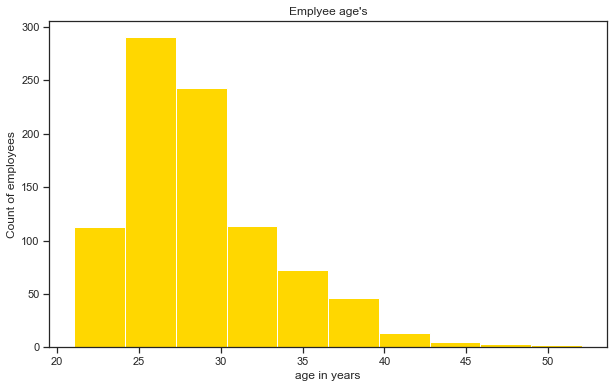

In [195]:
plt.hist(x="Age in YY.",data= employeedata, color="gold")
plt.xlabel('age in years')
plt.ylabel('Count of employees')
plt.title("Emplyee age's")
plt.show()

__OBSERVATION-__ 
It is observed that most of the employees are between 25 to 30 age and there are very less number of employees present whose age is above 40.

### 1.2 Employee's Experience

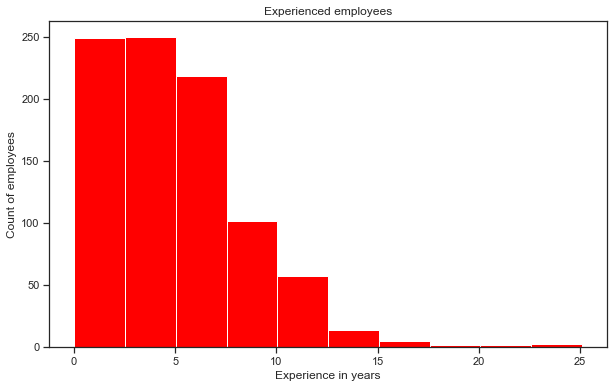

In [196]:
plt.hist(x="Experience (YY.MM)",data= employeedata, color="red")
plt.xlabel('Experience in years')
plt.ylabel('Count of employees')
plt.title('Experienced employees')
plt.show()

__OBSERVATION-__ 
It is observed that most of the employees have experience below 5 years and there is only one employee who has work experience of 20+ years.

### 1.3 Employee's Tenure


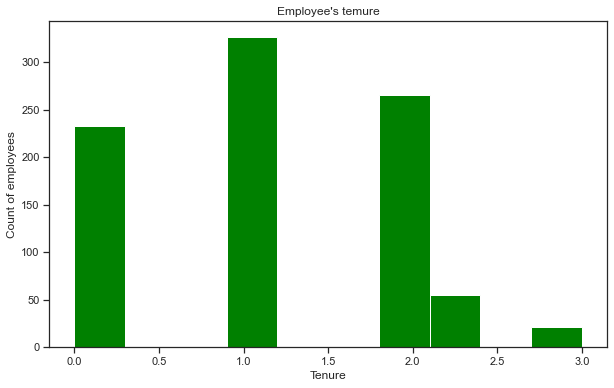

In [197]:
plt.hist(x="Tenure",data= employeedata, color="green")
plt.xlabel('Tenure')
plt.ylabel('Count of employees')
plt.title("Employee's temure")
plt.show()

__OBSERVATION-__ Most of the employees are connected with the company from the past 1 year of tenure.

### 1.4 Locational analysis

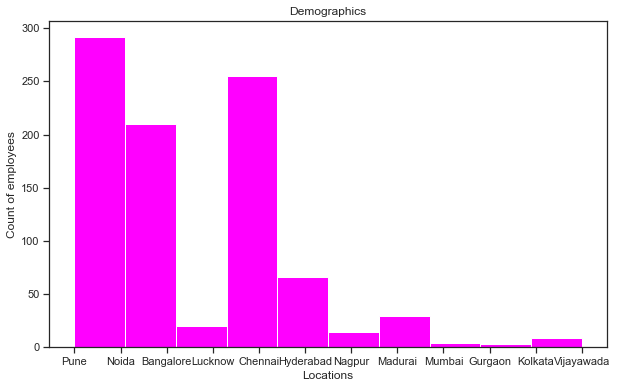

In [198]:
plt.hist(x="Location",data= employeedata, color="magenta")
plt.xlabel('Locations')
plt.ylabel('Count of employees')
plt.title("Demographics")
plt.show()

__OBSERVATION-__ 
It is observed that most of the employees working in the company are from Pune, chennai and noida.

## 2. Analysis on the basis of gender

### 2.1 Count of Genders

In [199]:
gender_dict = dict(employeedata["Gender "].value_counts())
gender_dict

{'Male': 659, 'Female': 237, 'other': 6}

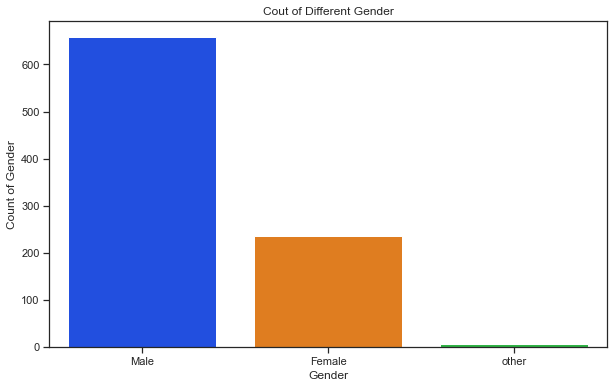

In [200]:
sns.countplot(x='Gender ', data=employeedata, palette='bright')
plt.xlabel('Gender')
plt.ylabel('Count of Gender')
plt.title('Cout of Different Gender')
plt.show()

__OBSERVATION-__

Here, from the chart, it’s visible that the count of males is more than another category of the gender.

Male: 655,
Female: 234,
Other: 6

__Now, let’s figure out that how gender could be the reason for employees to leave the company or to stay in__

### 2.2. Representation of genders on the basis of staying or leaving the firm. 

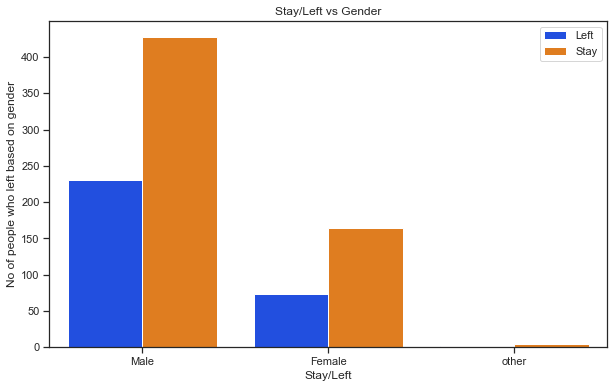

In [201]:
sns.countplot(x='Gender ', data=employeedata, hue='Stay/Left',palette='bright')
plt.title("Stay/Left vs Gender")
plt.xlabel("Stay/Left")
plt.ylabel("No of people who left based on gender")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)
plt.show()

__OBSERVATION-__

Here, from the chart it’s visible that it heavily depends on males, also we can see that it’s either male, female or others but more number of them are staying in the company.

## 3. Analysis on the basis of promoted and non promoted employees

### 3.1 Count of promoted and non promoted employees

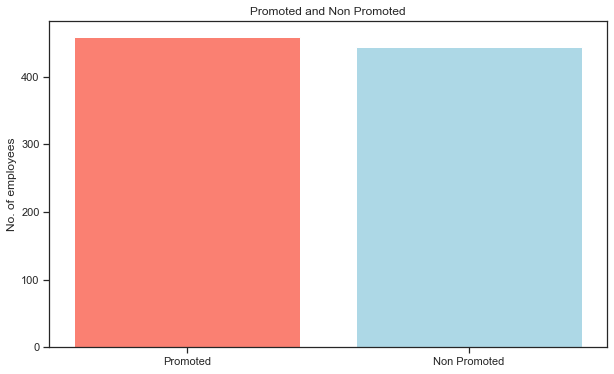

In [202]:
count_promotion=employeedata['Promoted/Non Promoted'].value_counts()
plt.bar(count_promotion.index,count_promotion, color=['salmon','lightblue'])
plt.ylabel("No. of employees")
plt.title("Promoted and Non Promoted")
plt.show()

__OBSERVATION-__
From the above chart, we can see that when it comes to Promoted and Non-Promoted employees it’s quiet in balanced number.

Now, let’s figure out that how promotion could be the reason for employees to leave the company or to stay in.

### 3.2 Representation of employees staying or leaving with respect to their promotion

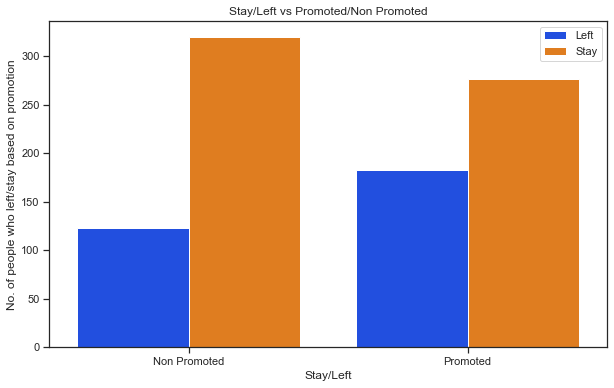

In [203]:
sns.countplot(x='Promoted/Non Promoted', data=employeedata, hue='Stay/Left', palette='bright')
sns.set_theme(style="ticks", rc={'figure.figsize':(10,6)})
plt.title("Stay/Left vs Promoted/Non Promoted")
plt.xlabel("Stay/Left")
plt.ylabel("No. of people who left/stay based on promotion")
plt.legend(["Left","Stay"])
plt.show()

__OBSERVATION-__
Here, from the chart, it’s visible that the ones who are not promoted are leaving the company more as compared to the ones who are promoted which is also an obvious thing likely to happen.

## 4 Analysis on the basis of different functions/departments present in the company

### 4.1 Function (Operation/ Support/ Sales)

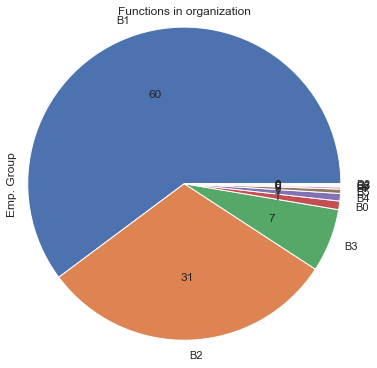

In [204]:
employeedata['Emp. Group'].value_counts().plot(kind='pie',autopct='%1.0f',title="Functions in organization", radius=1.2)
plt.show()

__OBSERVATION-__
we can see that majority of the function performed by employees are Operation itself then support and at the last it’s sales. So, let’s figure out that how function could be the reason for employees to leave the company or to stay in.

### 4.2 Representation of employees staying or leaving with respect to different departments/functions

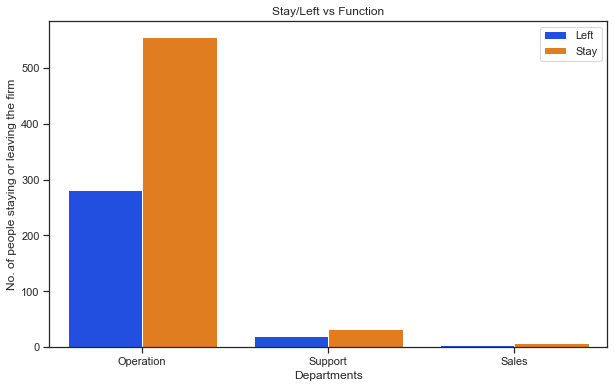

In [205]:
sns.countplot(x='Function', data=employeedata, hue='Stay/Left',palette='bright')
plt.title("Stay/Left vs Function")
plt.xlabel("Departments")
plt.ylabel("No. of people staying or leaving the firm")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)
plt.show()

## 5 Analysis on the basis of job role match

### 5.1 Job role match (Yes/ No)

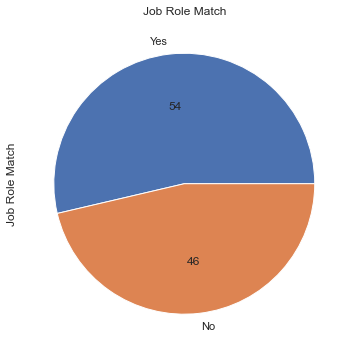

In [206]:
employeedata['Job Role Match'].value_counts().plot(kind='pie',autopct='%1.0f', title="Job Role Match")
plt.show()

__OBSERVATION-__
We can see that majority of the employees have their correct role in Job

### 5.2 Representation of employees staying or leaving with respect to their job match

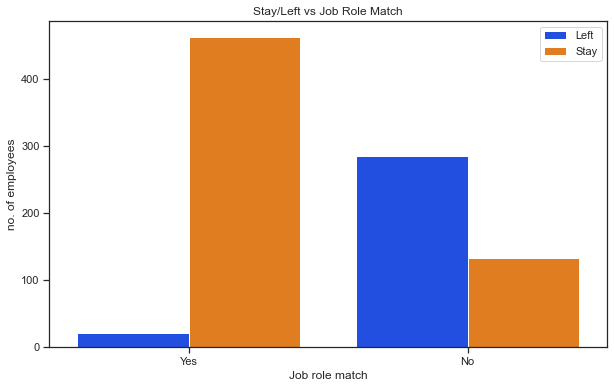

In [207]:
sns.countplot(x='Job Role Match', data=employeedata, hue='Stay/Left',palette='bright',)
plt.title("Stay/Left vs Job Role Match")
plt.xlabel("Job role match")
plt.ylabel("no. of employees")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)
plt.show()

__OBSERVATION-__
Here, in the above chart, we can see that the number of employees who got the correct job role is staying in the company rather than the ones who don’t have their right job role.

## 6. Analysis of employees staying or leaving with respect to their age

### 6.1 Joint plot to analyse age 

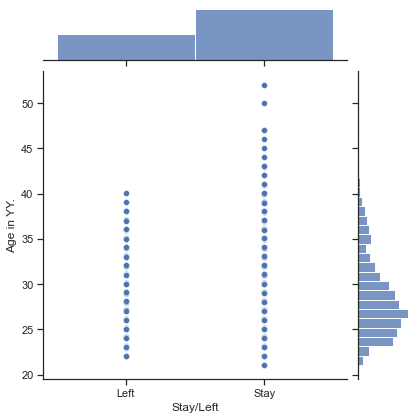

In [208]:
sns.jointplot(x='Stay/Left',y='Age in YY.',data=employeedata, kind="scatter")
plt.show()

### 6.2 KDE plot to analyse the age of the employees

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0`, but please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0`, but please update your code.
  warnings.warn(msg, UserWarning)


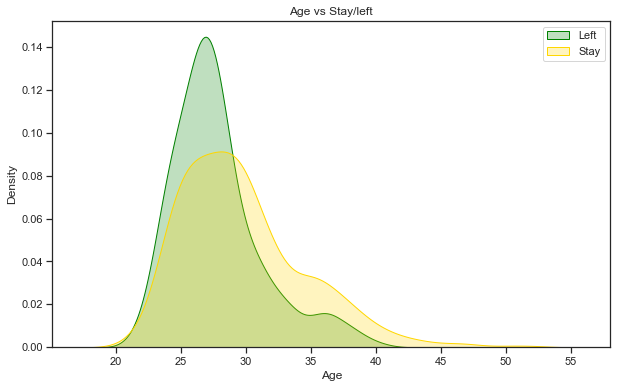

In [209]:
sns.kdeplot(employeedata.loc[(employeedata['Stay/Left'] == 'Left'),'Age in YY.'] , color='green',shade=True, label='Left',shade_lowest=True)
sns.kdeplot(employeedata.loc[(employeedata['Stay/Left'] == 'Stay'),'Age in YY.'] , color='gold',shade=True, label='Stay', shade_lowest=True)
plt.xlabel('Age')
plt.title('Age vs Stay/left')
plt.legend(["Left","Stay"])
plt.show()

__OBSERVATION-__
In the above graphs, we can see that the ones who are having more age are staying back in the company rather than the ones who have comparatively less age.

## 7. Analysis of employees staying or leaving with respect to their Experience

### 7.1 Jointplot to analyse experienced employees

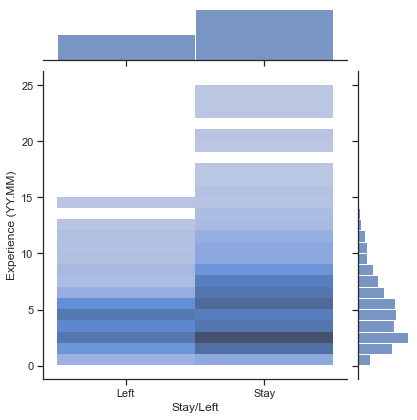

In [210]:
sns.jointplot(x='Stay/Left',y='Experience (YY.MM)',data=employeedata, kind="hist", palette='bright')
plt.show()

### 7.2 KDE plot to analyse experienced employees

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0`, but please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0`, but please update your code.
  warnings.warn(msg, UserWarning)


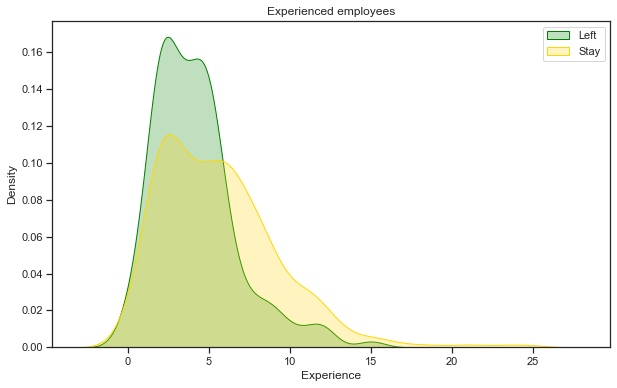

In [211]:
sns.kdeplot(employeedata.loc[(employeedata['Stay/Left'] == 'Left'),'Experience (YY.MM)'] , color='green',shade=True, label='Left',shade_lowest=True)
sns.kdeplot(employeedata.loc[(employeedata['Stay/Left'] == 'Stay'),'Experience (YY.MM)'] , color='gold',shade=True, label='Stay', shade_lowest=True)
plt.xlabel('Experience')
plt.title('Experienced employees')
plt.legend(["Left","Stay"])
plt.show()

__OBSERVATION-__
Here in the above graphs, we can see that the employees who have more experience are staying in the company rather than the ones who have comparatively less experience.

## 8. Analysis of employee dataset using pairplot

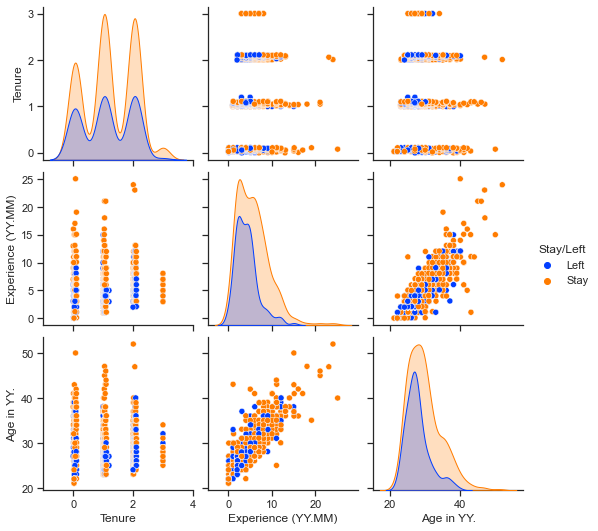

In [212]:
sns.pairplot(employeedata,hue="Stay/Left" ,palette='bright')
plt.show()

__OBSERVATION-__
The above graph shows a pairwise relationships in the employee dataset.

## 9. Analysis of employee dataset using boxplot

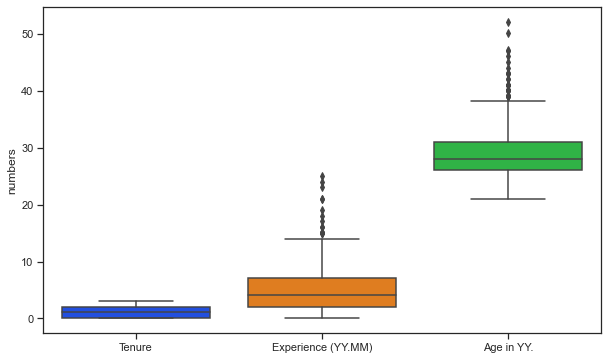

In [213]:
sns.boxplot(data=employeedata, palette='bright')
plt.ylabel("numbers")
plt.show()

__OBSERVATION-__
The above box plot graph shows the average Tenure, Experience and Age present in the company along with the outliers in case of Experience and Age.

## 10. Employees leaving the firm

In [214]:
attrition_dict=dict(employeedata['Stay/Left'].value_counts())
attrition_dict

{'Stay': 596, 'Left': 306}

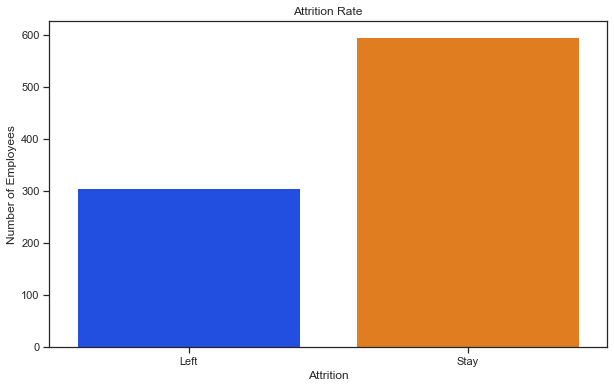

In [215]:
sns.countplot(x='Stay/Left' , data= employeedata, palette='bright')
plt.xlabel('Attrition')
plt.ylabel('Number of Employees')
plt.title('Attrition Rate')
plt.show()

__OBSERVATION-__
The above graph represents the number of employees leaving or staying in the firm and it is observed that around 300 employees leave the company.

## 11. Analysis on the basis of hiring sources

### 11.1 Count of employees from different sources of hiring

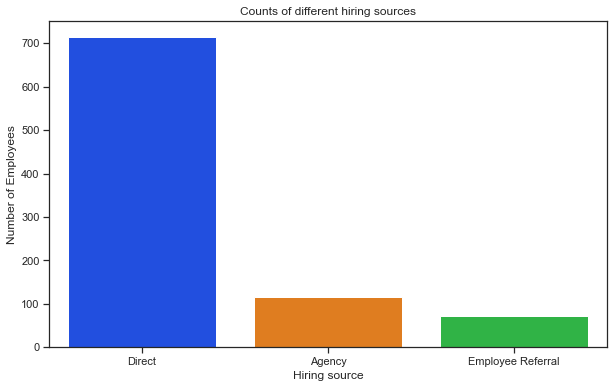

In [216]:
sns.countplot(x='Hiring Source' , data= employeedata, palette='bright')
plt.xlabel('Hiring source')
plt.ylabel('Number of Employees')
plt.title('Counts of different hiring sources')
plt.show()

__OBSERVATION-__
It shows that the most of the employees are hired through direct hiring where as only around 50 employees were hired through employee referrals.

### 11.2 Employees stay/leave with respect to the hiring sources

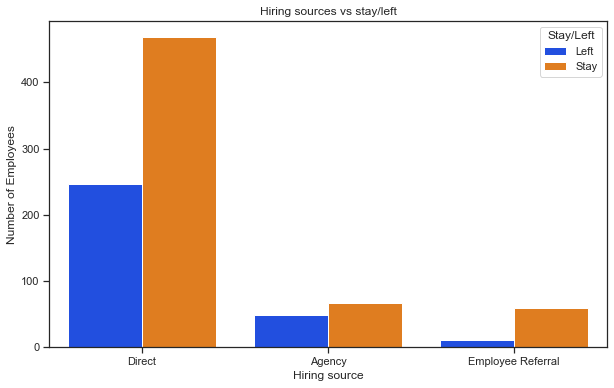

In [217]:
sns.countplot(x='Hiring Source' , hue='Stay/Left', data= employeedata, palette='bright')
plt.xlabel('Hiring source')
plt.ylabel('Number of Employees')
plt.title('Hiring sources vs stay/left')
plt.show()

__OBSERVATION-__
It has been observed that most of the employees who left the job were hired directly



## 12. Tenure vs Experience vs Stay left

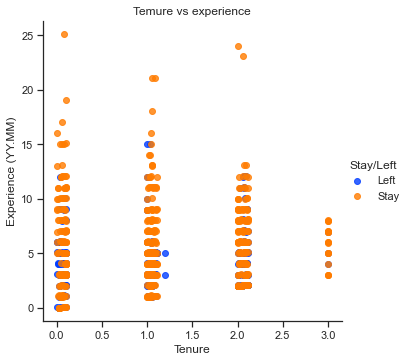

In [218]:
sns.lmplot(x="Tenure", y="Experience (YY.MM)", hue="Stay/Left", data=employeedata, fit_reg=False, palette='bright')
plt.title("Temure vs experience")
plt.show()

__OBSERVATION-__ 
It is observed that employees having Tenure less than 1.5 and having experience of less than 15 years have more chances of leaving the firm.

## 13 Age vs Experience vs Stay/Left

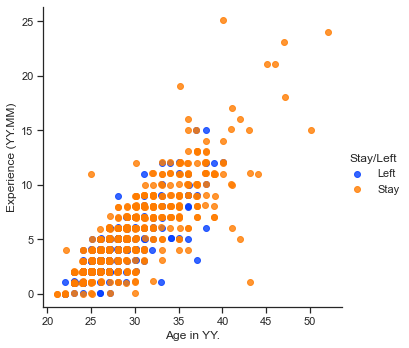

In [219]:
sns.lmplot(x='Age in YY.', y='Experience (YY.MM)', data=employeedata, hue='Stay/Left', fit_reg=False, palette='bright')
plt.show()

__OBSERVATION-__ 
It is observed that employees having experience less than 15 and who are also less than 40 yeras of age have more chances of leaving the firm.

__-----------------------------------------------------------------------END OF SECTION 2-----------------------------------------------------------------------------__


# SECTION 3 -  Model Development

In [220]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## 1 Logistic Regression

In [221]:
#Fitting the model
LRC=LogisticRegression(random_state=0)
LRC.fit(X_train, Y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=0)

In [222]:
#prediction on the test dataset
Y_pred=LRC.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0])

In [223]:
# To evaluate the perfromance of model
# Creating the confusion matrix
cm=confusion_matrix(Y_test, Y_pred)
cm

array([[109,  11],
       [ 16,  45]])

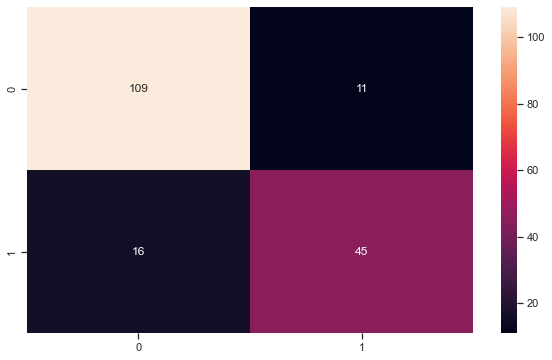

In [224]:
#heatmap
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [225]:
# Inbuilt method accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)*100

85.0828729281768

In [226]:
# hard code
acc=(cm[0,0] + cm[1,1]) / (cm[0,0] + cm[1,1]+cm[1,0]+cm[0,1]) *100
print('Accuracy is --->' , acc)
pr=cm[0,0]/(cm[0,0]+cm[1,0])*100
print('precision --->' , pr)
rr=cm[0,0]/(cm[0,0]+cm[0,1])*100
print('recall --->' , rr)
f1score=2*(pr*rr)/(pr+rr)
print("f1score---->", f1score)

Accuracy is ---> 85.0828729281768
precision ---> 87.2
recall ---> 90.83333333333333
f1score----> 88.97959183673468


In [227]:
# Complete perfromance report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       120
           1       0.80      0.74      0.77        61

    accuracy                           0.85       181
   macro avg       0.84      0.82      0.83       181
weighted avg       0.85      0.85      0.85       181



## 2 KNN MODEL

In [228]:
knn=KNeighborsClassifier(n_neighbors=5,p=2)
knn.fit(X_train,Y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [229]:
#prediction---test dataset
Y_pred=knn.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1])

In [230]:
# evaluating the performance of model
cm_knn=confusion_matrix(Y_test,Y_pred)
cm_knn

array([[114,   6],
       [ 17,  44]])

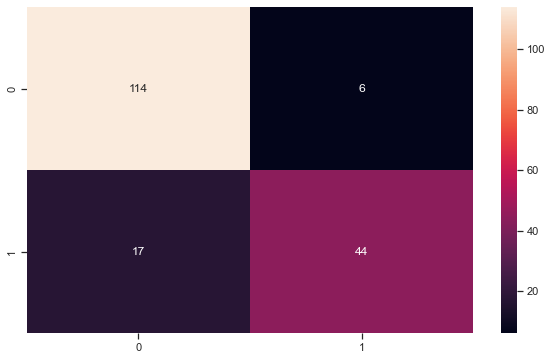

In [231]:
#Heatmap
import seaborn as sns
sns.heatmap(cm_knn, annot=True, fmt='g')
plt.show()

In [232]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)*100

87.29281767955801

In [233]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       120
           1       0.88      0.72      0.79        61

    accuracy                           0.87       181
   macro avg       0.88      0.84      0.85       181
weighted avg       0.87      0.87      0.87       181



## 3 Decision Tree Model

In [234]:
#Creating the model - entropy as attribute selection measure
DTC=DecisionTreeClassifier(criterion='entropy',random_state=0) #ig
DTC.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [235]:
#predicition on test data set
Y_pred=DTC.predict(X_test)
Y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0])

In [236]:
# evaluating the performance of model
cm_dt=confusion_matrix(Y_test,Y_pred)
cm_dt

array([[109,  11],
       [ 18,  43]])

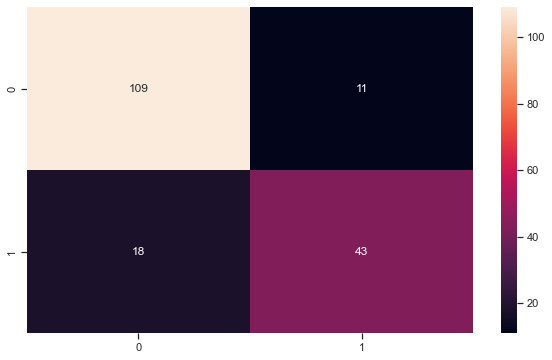

In [237]:
#plotting confusion matrix
sns.heatmap(cm_dt ,annot=True, fmt='g')
plt.show()

In [238]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)*100

83.97790055248619

In [239]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       120
           1       0.80      0.70      0.75        61

    accuracy                           0.84       181
   macro avg       0.83      0.81      0.82       181
weighted avg       0.84      0.84      0.84       181



In [240]:
#creating the model - gini index as attribute selection measure
DTC=DecisionTreeClassifier(criterion='gini', random_state=0) 
DTC.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [241]:
#predicition on test data set
Y_pred=DTC.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0])

In [242]:
# evaluating the performance of model
cm_dtg=confusion_matrix(Y_test,Y_pred)
cm_dtg

array([[108,  12],
       [ 20,  41]])

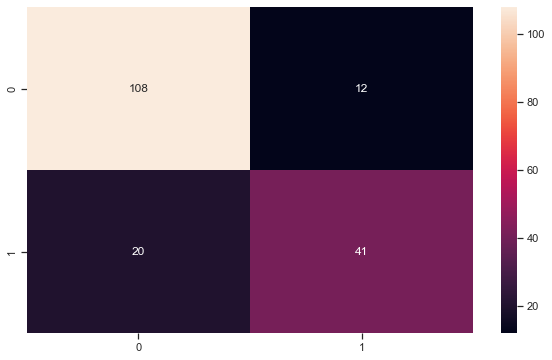

In [243]:
#plotting confusion matrix
sns.heatmap(cm_dtg ,annot=True, fmt='g')
plt.show()

In [244]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)*100

82.32044198895028

In [245]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       120
           1       0.77      0.67      0.72        61

    accuracy                           0.82       181
   macro avg       0.81      0.79      0.80       181
weighted avg       0.82      0.82      0.82       181



## 4 Navie Bayes Model

In [246]:
#model creation ---- Navie Bayes Classifier
NBC=GaussianNB()
NBC.fit(X_train,Y_train) #training dataset

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [247]:
#prediction
Y_pred=NBC.predict(X_test)

In [248]:
# evaluating the performance of model
from sklearn.metrics import confusion_matrix
cm_nb=confusion_matrix(Y_test,Y_pred)
cm_nb

array([[  0, 120],
       [  0,  61]])

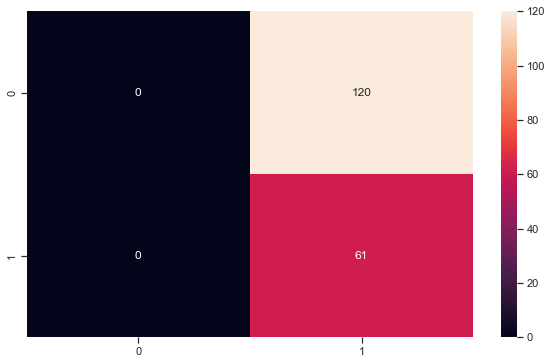

In [249]:
#plotting confusion matrix
sns.heatmap(cm_nb ,annot=True, fmt='g')
plt.show()

In [250]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)*100

33.70165745856354

# SECTION 4 -  Comparing The Accuracy Of Different Classification Models

In [273]:
model_scores={'Logistic Regression':LRC.score(X_test,Y_test)*100,
             'KNN classifier':knn.score(X_test,Y_test)*100,
              'Decision tree':DTC.score(X_test,Y_test)*100,
              'Naive BaYes':NBC.score(X_test,Y_test)*100
             }
model_scores

{'Logistic Regression': 85.0828729281768,
 'KNN classifier': 87.29281767955801,
 'Decision tree': 82.32044198895028,
 'Naive BaYes': 33.70165745856354}

In [274]:
model_compare=pd.DataFrame(model_scores,index=['Accuracy']).round(decimals=2)
model_compare

,Logistic Regression,KNN classifier,Decision tree,Naive BaYes
Accuracy,85.08,87.29,82.32,33.7


<AxesSubplot:>

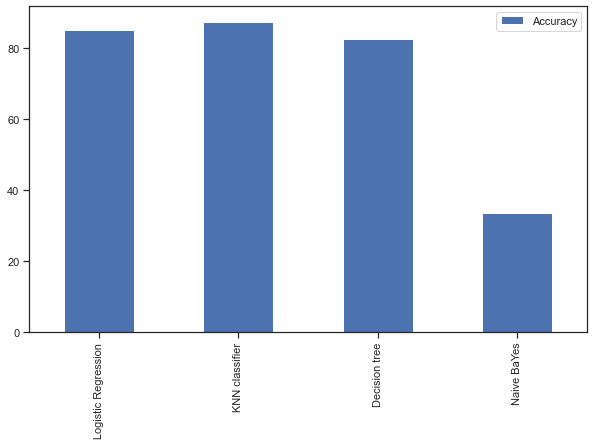

In [275]:
model_compare.T.plot(kind='bar') # (T is here for transpose)`

__OBSERVATION-__ 
The above graph summarises the ML models accuracies. Here we can see that KNN classifier has the highest accuracy of 87%, Logistic regression has accuracy of 85.08%, Decision tree has an accuracy of 82.38 and Naive bayes model has an accuracy of 33.7%. Therefore we choose KNN Model for the attrition prediction.

__----------------------------------------------------------------------END OF THE PROJECT-----------------------------------------------------------------------------__